In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kanikamittal18","key":"d6f29f66733c2723620092b42dbb994d"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gpiosenka/butterfly-images40-species

butterfly-images40-species.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip butterfly-images40-species.zip

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_url = '/kaggle/input/butterfly-images40-species'
train_dir = '/content/train'
test_dir = '/content/test'
val_dir = '/content/valid'

In [ ]:
img_height,img_width=224,224
batch_size=32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  shuffle=False,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12594 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN ARGUS', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH', 'CLEARWING MOTH', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMET MOTH', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'EMPEROR GUM MOTH', 'GARDEN TIGER MOTH', 'GIANT LEOPARD MOTH', 'GLITTERING SAPPHIRE', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREEN HAIRSTREAK', 'GREY HAIRSTREAK', 'HERCULES MOTH', 'HUMMING BIRD HAWK MOTH', 'INDRA SWALLOW', 'IO MOTH', 'Iphiclus si

In [ ]:
len(class_names)

100

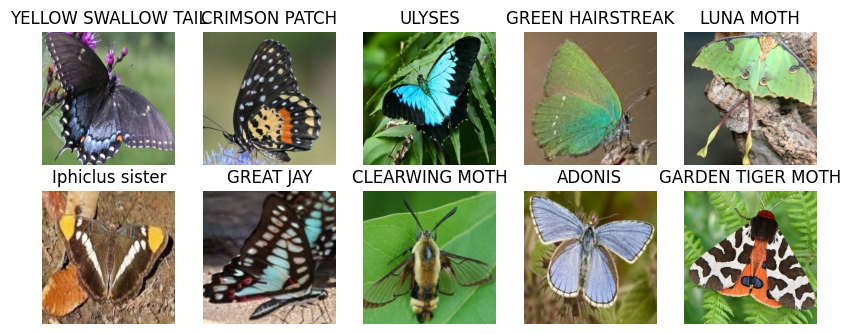

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
model = Sequential()

base_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=100,
                   weights='imagenet')

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
for layer in base_model.layers:
        layer.trainable=False

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
Total params: 24688100 (94.18 MB)
Trainable params: 1100388 (4.20 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,

                   )

In [ ]:
from google.colab import drive
import pickle


drive_path = '/content/drive/MyDrive/FDS PROJECT'
with open(drive_path + 'img_history.p', 'wb') as file:
    pickle.dump(history, file)

In [ ]:
from google.colab import drive
import pickle
drive_path = '/content/drive/MyDrive/FDS PROJECT'
with open(drive_path + 'img_history.p', 'rb') as file:
    loaded_history = pickle.load(file)

In [ ]:
print(loaded_history)

In [ ]:
loss_values = loaded_history.history['loss']
val_loss_values = loaded_history.history['val_loss']

plt.figure(figsize=(10, 4))
plt.plot(loss_values)
plt.plot(val_loss_values)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(loaded_history.history['accuracy'])
plt.plot(loaded_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed = 123,
    image_size=(img_height,img_width),
    shuffle=False
)

Found 500 files belonging to 100 classes.


In [ ]:
test_images, test_labels = tuple(zip(*test_dataset))

predictions = model.predict(test_dataset)
score = tf.nn.softmax(predictions)

16/16 [==============================] - 104s 6s/step


In [ ]:
result = model.evaluate(test_dataset)
print("Test loss, test accuracy:", result)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_test = np.concatenate(test_labels)
y_pred = np.array([np.argmax(s) for s in score])

print(classification_report(y_test, y_pred, target_names=class_names))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[-2].output)

In [ ]:
train_features = intermediate_layer_model.predict(train_dataset)
val_features = intermediate_layer_model.predict(val_dataset)
test_features = intermediate_layer_model.predict(test_dataset)

16/16 [==============================] - 94s 6s/step


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [ ]:
train_features_flatten = train_features.reshape(train_features.shape[0], -1)
val_features_flatten = val_features.reshape(val_features.shape[0], -1)
test_features_flatten = test_features.reshape(test_features.shape[0], -1)

In [ ]:
knn_classifier.fit(train_features_flatten, train_dataset.labels)

In [ ]:
test_predictions = knn_classifier.predict(test_features_flatten)

In [ ]:
test_accuracy = accuracy_score(test_dataset.labels, test_predictions)
conf_matrix = confusion_matrix(test_dataset.labels, test_predictions)

In [ ]:
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[-2].output)

train_features = intermediate_layer_model.predict(train_dataset)
val_features = intermediate_layer_model.predict(val_dataset)
test_features = intermediate_layer_model.predict(test_dataset)

decision_tree_classifier = DecisionTreeClassifier()

train_features_flatten = train_features.reshape(train_features.shape[0], -1)
val_features_flatten = val_features.reshape(val_features.shape[0], -1)
test_features_flatten = test_features.reshape(test_features.shape[0], -1)

decision_tree_classifier.fit(train_features_flatten, train_dataset.labels)

test_predictions = decision_tree_classifier.predict(test_features_flatten)

test_accuracy = accuracy_score(test_dataset.labels, test_predictions)
conf_matrix = confusion_matrix(test_dataset.labels, test_predictions)

print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[-2].output)

train_features = intermediate_layer_model.predict(train_dataset)
val_features = intermediate_layer_model.predict(val_dataset)
test_features = intermediate_layer_model.predict(test_dataset)

train_features_flatten = train_features.reshape(train_features.shape[0], -1)
val_features_flatten = val_features.reshape(val_features.shape[0], -1)
test_features_flatten = test_features.reshape(test_features.shape[0], -1)

svm_classifier = SVC(kernel='linear', C=1.0)

scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_flatten)
val_features_scaled = scaler.transform(val_features_flatten)
test_features_scaled = scaler.transform(test_features_flatten)

svm_classifier.fit(train_features_scaled, train_dataset.labels)

test_predictions = svm_classifier.predict(test_features_scaled)

test_accuracy = accuracy_score(test_dataset.labels, test_predictions)
conf_matrix = confusion_matrix(test_dataset.labels, test_predictions)

print("SVM Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

def predict_class(new_data, model):

    predictions = y_pred
    return predictions

flat_data = []
url = input('Enter your URL: ')
img = imread(url)
img_resized = resize(img, (150, 150, 3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)

plt.imshow(img_resized)
plt.show()


CATEGORIES = ['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMET MOTH', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'EMPEROR GUM MOTH', 'GARDEN TIGER MOTH', 'GIANT LEOPARD MOTH', 'GLITTERING SAPPHIRE', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREEN HAIRSTREAK', 'HERCULES MOTH', 'HUMMING BIRD HAWK MOTH', 'INDRA SWALLOW', 'IO MOTH', 'Iphiclus sister', 'JULIA', 'LARGE MARBLE', 'LUNA MOTH', 'MADAGASCAN SUNSET MOTH', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'OLEANDER HAWK MOTH', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW', 'POLYPHEMUS MOTH', 'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION MARK', 'RED ADMIRAL', 'RED CRACKER', 'RED POSTMAN', 'RED SPOTTED PURPLE', 'ROSY MAPLE MOTH', 'SCARCE SWALLOW', 'SILVER SPOT SKIPPER', 'SIXSPOT BURNET MOTH', 'SLEEPY ORANGE', 'SOOTYWING', 'SOUTHERN DOGFACE', 'STRAITED QUEEN', 'TROPICAL LEAFWING', 'TWO BARRED FLASHER', 'ULYSES', 'VICEROY', 'WHITE LINED SPHINX MOTH', 'WOOD SATYR', 'YELLOW SWALLOW TAIL', 'ZEBRA LONG WING']

y_out = predict_class(flat_data, model)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')